# read_htmlによるデータの取得と表示

In [1]:
import pandas as pd

In [2]:
# YahooファイナンスからAppleの株価を取得
URL = 'https://finance.yahoo.com/quote/AAPL/history?p=AAPL'

In [3]:
# 変数dataにデータフレームのリストを格納する: pd.read_html(URL, header=0:先頭行を含めるか含めないか)
data = pd.read_html(URL, header=0)

In [4]:
# 結果はデータフレームのリスト形式で取得される
# 複数のテーブルがある場合、1番目のテーブルはdata[0]
data[0].head() 

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Mar 31, 2021",121.65,123.52,121.15,122.15,122.15,118162900
1,"Mar 30, 2021",120.11,120.40,118.86,119.90,119.90,85671900
2,"Mar 29, 2021",121.65,122.58,120.73,121.39,121.39,80819200
3,"Mar 26, 2021",120.35,121.48,118.92,121.21,121.21,93958900
4,"Mar 25, 2021",119.54,121.66,119.00,120.59,120.59,98844700


In [5]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Nov 11, 2020",117.19,119.63,116.44,119.49,119.31,112295000
97,"Nov 10, 2020",115.55,117.59,114.13,115.97,115.80,138023400
98,"Nov 09, 2020",120.50,121.99,116.05,116.32,116.15,154515300
99,"Nov 06, 2020",118.32,119.20,116.13,118.69,118.51,114457900
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


# 取得データの変換1（数値）

## 取得データの問題点
・数値が入るべき列に文字列 'Close price adjusted for splits...'が入っている行がある。  
・列Dateに格納されている日付が、Apr 24, 2020 のように文字列になっていて、時系列にグラフを表示できない。

In [6]:
# 文字列を数値に変換する: 
# pd.to_numeric(arg;変換したいlistなど, errors='raise';例外を発生させる, 'coerce';NaNを設定, 'ignore';数値変換を行わない)
data[0]['Adj Close**'] = pd.to_numeric(data[0]['Adj Close**'], errors='coerce')

In [7]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Nov 11, 2020",117.19,119.63,116.44,119.49,119.31,112295000
97,"Nov 10, 2020",115.55,117.59,114.13,115.97,115.80,138023400
98,"Nov 09, 2020",120.50,121.99,116.05,116.32,116.15,154515300
99,"Nov 06, 2020",118.32,119.20,116.13,118.69,118.51,114457900
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,NaN,*Close price adjusted for splits.**Adjusted cl...


In [8]:
# NaNが含まれている行を削除する: 
# DataFrame.dropna(axis=0;欠損値を含む行を削除, =1;列を削除, inplace=True;実行結果を保存, =False;保存しない)
data[0].dropna(inplace=True)

In [9]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
95,"Nov 12, 2020",119.62,120.53,118.57,119.21,119.03,103162300
96,"Nov 11, 2020",117.19,119.63,116.44,119.49,119.31,112295000
97,"Nov 10, 2020",115.55,117.59,114.13,115.97,115.80,138023400
98,"Nov 09, 2020",120.50,121.99,116.05,116.32,116.15,154515300
99,"Nov 06, 2020",118.32,119.20,116.13,118.69,118.51,114457900


# 取得データの変換2（日付）

## 取得データの問題点
・数値が入るべき列に文字列 'Close price adjusted for splits...'が入っている行がある。  
・列Dateに格納されている日付が、Apr 24, 2020 のように文字列になっていて、時系列にグラフを表示できない。

In [10]:
from datetime import datetime as dt

In [11]:
# 文字列を日付型に変換する:
# datetime.strptime(文字列, 日付の書式%b;月名の短縮形Aprなど, %d;日にちを0埋めした10進表記, %Y;西暦4桁の10進表記)
data[0]['Date2'] = [dt.strptime(i, '%b %d, %Y') for i in data[0]['Date']]
# ↑リスト内包表記: for分から取得した要素をリストに格納する
# [処理 for 変数 in リスト]: リストから取得したデータを、変数に入れ、処理を行って、渡すを繰り返す

In [12]:
data[0]['Date2'].head()

0   2021-03-31
1   2021-03-30
2   2021-03-29
3   2021-03-26
4   2021-03-25
Name: Date2, dtype: datetime64[ns]

In [13]:
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date2
0,"Mar 31, 2021",121.65,123.52,121.15,122.15,122.15,118162900,2021-03-31
1,"Mar 30, 2021",120.11,120.40,118.86,119.90,119.90,85671900,2021-03-30
2,"Mar 29, 2021",121.65,122.58,120.73,121.39,121.39,80819200,2021-03-29
3,"Mar 26, 2021",120.35,121.48,118.92,121.21,121.21,93958900,2021-03-26
4,"Mar 25, 2021",119.54,121.66,119.00,120.59,120.59,98844700,2021-03-25


# 株価グラフの描画

In [14]:
# DataFrameにインデックスを設定する: DataFrame.set_index(列名, 任意の引数inplace=True;実行結果を保存する, =False;保存しない)
data[0].set_index('Date2', inplace=True)

In [15]:
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
Date2,,,,,,,
2021-03-31,"Mar 31, 2021",121.65,123.52,121.15,122.15,122.15,118162900
2021-03-30,"Mar 30, 2021",120.11,120.40,118.86,119.90,119.90,85671900
2021-03-29,"Mar 29, 2021",121.65,122.58,120.73,121.39,121.39,80819200
2021-03-26,"Mar 26, 2021",120.35,121.48,118.92,121.21,121.21,93958900
2021-03-25,"Mar 25, 2021",119.54,121.66,119.00,120.59,120.59,98844700


In [16]:
# データタイプの確認: DataFrame.dtype
data[0]['Adj Close**'].dtype

dtype('float64')

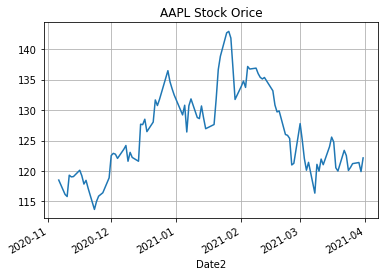

In [17]:
# DataFrameからグラフを描画する: 
# DataFrame.plot(任意の引数title='タイトル', grid=True;目盛線表示, kind='line';折れ線グラフ, 'bar';棒グラフ, 'scatter';散布図, 'pie';円グラフ)
data[0]['Adj Close**'].plot(title='AAPL Stock Orice', grid=True)

# 株価データの保存

In [18]:
# DataFrameをcsvファイルに出力: DataFrame.to_csv('保存場所', 'ファイル名')
data[0].to_csv('AAPL_Stock.csv')